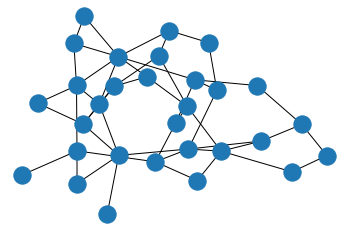

In [23]:
import matplotlib
%matplotlib inline
from pylab import *
import networkx as nx
import random as rd

n = 30 # number of nodes: grid of 5x6

def initialize():
    global g
    g=nx.grid_2d_graph(6, 5, periodic=False, create_using=None) #create the 2d grid network
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

initialize()
for i in range(1000):
    update()
observe()

Observation: After around 100 time steps, the network is still very much grid-like, but after 1000 time steps the topology has become quite random after each run.

## Task 2

In [13]:
m0 = 5 # number of nodes in initial condition
m = 1 # number of edges per new node

def initialize2():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe2():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update2():
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)
    

<ipython-input-13-84d3f59d3384>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  r = uniform(0, sum(g.degree(i) for i in nds))


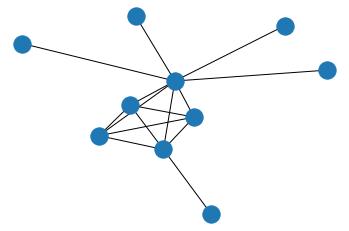

In [14]:
initialize2()
for i in range(100):
    update2()
observe2()

In [16]:
#For m=3: 
m0 = 5 # number of nodes in initial condition
m = 3 # number of edges per new node

def initialize3():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe3():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update3():
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)
    

<ipython-input-16-d3ea9367e9b9>:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  r = uniform(0, sum(g.degree(i) for i in nds))


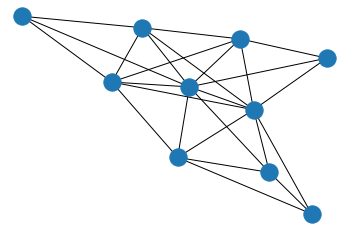

In [17]:
initialize3()
for i in range(100):
    update3()
observe3()

In [20]:
#For m =5
m0 = 5 # number of nodes in initial condition
m = 5 # number of edges per new node

def initialize4():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe4():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update4():
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)
    

<ipython-input-20-34c93cc89cbc>:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  r = uniform(0, sum(g.degree(i) for i in nds))


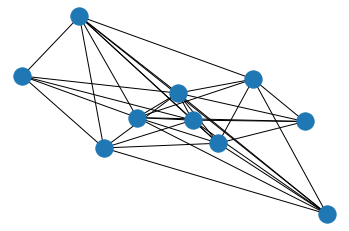

In [21]:
initialize4()
for i in range(100):
    update4()
observe4()

Observation: The higher m is, the more edges the newly added nodes have, and so the network will simply be more interconnected. This is intuitive and obvious. It also seems like the number of nodes being severely left out is lower with higher m? Not too sure about this.